In [1]:
import pandas as pd
import numpy as np
import json
from tqdm.notebook import tqdm_notebook
import tmdbsimple as tmdb
import matplotlib.pyplot as plt

from scipy import stats
import scipy
scipy.__version__

'1.8.1'

In [2]:
import seaborn as sns
import plotly.express as px

In [3]:
df= pd.read_csv('Data/Two_Years_tmdb_combined_data.csv.gz')
df

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt1361336,0.0,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,NaN,50000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807.0,en,Tom & Jerry,...,132000000.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,0.0,6.975,2069.0,PG
2,tt1361336,0.0,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,NaN,50000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807.0,en,Tom & Jerry,...,132000000.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,0.0,6.975,2069.0,PG
3,tt1361336,0.0,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,NaN,50000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807.0,en,Tom & Jerry,...,132000000.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,0.0,6.975,2069.0,PG
4,tt1361336,0.0,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,NaN,50000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807.0,en,Tom & Jerry,...,132000000.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,0.0,6.975,2069.0,PG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8693,tt7797670,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,956214.0,en,Edmund Kemper Part 2: La Mort C'est La Vie,...,0.0,91.0,[],Released,NaN,Edmund Kemper Part 2: La Mort C'est La Vie,0.0,0.000,0.0,NaN
8694,tt7797790,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,956219.0,en,Edmund Kemper Part 3: La mort sévit,...,0.0,72.0,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,NaN,Edmund Kemper Part 3: La mort sévit,0.0,0.000,0.0,NaN
8695,tt8665056,0.0,NaN,NaN,0.0,"[{'id': 37, 'name': 'Western'}]",http://skeletoncreekproductions.com/p-movie-br...,885436.0,en,Guns Along The Bravo,...,0.0,85.0,[],Released,Evil came to the Southwest until three blazing...,Guns Along The Bravo,0.0,0.000,0.0,NaN
8696,tt8795764,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",https://www.utahwolf.com/films/coming-soon-new...,871624.0,en,New Breed,...,0.0,57.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,New Breed,0.0,0.000,0.0,NR


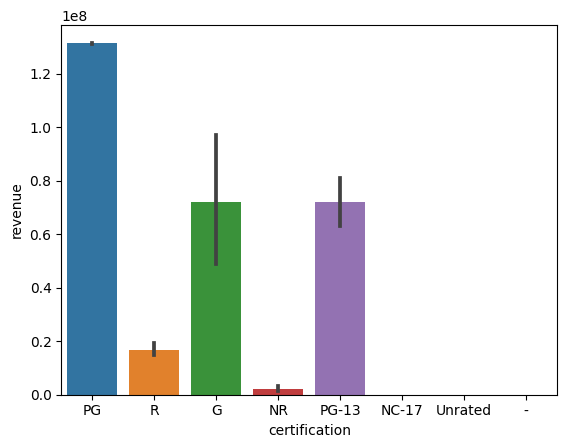

In [4]:
ax = sns.barplot(data=df, x='certification', y='revenue', ci=68)

In [6]:
df['certification'].value_counts()

PG         6266
R           451
PG-13       180
NR           66
G            24
NC-17         6
Unrated       1
-             1
Name: certification, dtype: int64

In [7]:
needed_cols=['certification', 'revenue']
df[needed_cols]

,certification,revenue
0,NaN,NaN
1,PG,132000000.0
2,PG,132000000.0
3,PG,132000000.0
4,PG,132000000.0
...,...,...
8693,NaN,0.0
8694,NaN,0.0
8695,NaN,0.0
8696,NR,0.0


In [10]:
groups = {}
for certification in df['certification'].unique():
    temp=df.loc[df['certification']==certification, 'revenue']
    groups[certification]= temp
    
    
groups.keys()

dict_keys([nan, 'PG', 'R', 'G', 'NR', 'PG-13', 'NC-17', 'Unrated', '-'])

In [11]:
groups.items()

dict_items([(nan, Series([], Name: revenue, dtype: float64)), ('PG', 1       132000000.0
2       132000000.0
3       132000000.0
4       132000000.0
5       132000000.0
           ...     
8360            0.0
8387            0.0
8442            0.0
8493            0.0
8580            0.0
Name: revenue, Length: 6266, dtype: float64), ('R', 3150         0.0
3151         0.0
3152         0.0
3156     14904.0
3161    105983.0
          ...   
8494         0.0
8528         0.0
8538         0.0
8563         0.0
8603         0.0
Name: revenue, Length: 451, dtype: float64), ('G', 3158    224834564.0
3165    169327687.0
3169            0.0
3420     27965865.0
3528     19748009.0
3563            0.0
3591    183611771.0
3614    103291131.0
3710     45554533.0
3837     68411275.0
4077            0.0
4139            0.0
4307            0.0
7510    579707738.0
7536       100202.0
7809    165335153.0
7900            0.0
7995     44460850.0
8029     80936232.0
8097     18634654.0
8131            0.0
8

## The stakeholder's first question is: does the MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie generates?



1A. (Null Hypothesis): a movies' Ratings doesn't affect the revenue it generates

1B. (Alternative Hypothesis): A movies' ratings can determine how much revenue a movie generates.

In [13]:
temp = np.abs(stats.zscore(groups['PG'])) > 3
temp.value_counts()

False    6208
True       58
Name: revenue, dtype: int64

In [14]:
#loop  through group dict
for certification,data in groups.items():
    #determine if there are any outliers
    outliers= np.abs(stats.zscore(data)) > 3
    ##Print a statement about how many outliers for which group name
    print(f'there were {outliers.sum()} outliers in the {certification} group')
    ##Remove the outliers from data and overwrite the sector data in the dict
    data = data.loc[~outliers]
    groups[certification] = data 

there were 0 outliers in the nan group
there were 58 outliers in the PG group
there were 11 outliers in the R group
there were 1 outliers in the G group
there were 3 outliers in the NR group
there were 5 outliers in the PG-13 group
there were 0 outliers in the NC-17 group
there were 0 outliers in the Unrated group
there were 0 outliers in the - group


In [15]:
stats.normaltest(groups['PG']).pvalue


0.0

In [16]:
stats.normaltest(groups['R']).pvalue<0.5

True

In [17]:
stats.normaltest(groups['PG-13']).pvalue<0.5


True

In [18]:
stats.normaltest(groups['G']).pvalue<0.5

True